# SysML v2 Specs Annex B: Example Model

Taken from the [SysML v2 Specifications](/files/doc/2-OMG_Systems_Modeling_Language_(SysML).pdf).


In [5]:
package VehicleModel {
    import Definitions::*;
    package Definitions {
        // These imports eliminate the need to import into each nested package
        import PartDefinitions::*;
        import PortDefinitions::*;
        import ItemDefinitions::*;
        import SignalDefinitions::*;
        import InterfaceDefinitions::*;
        import ActionDefinitions::*;
        import StateDefinitions::*;
        import RequirementDefinitions::*;
        import AttributeDefinitions::*;
        import IndividualDefinitions::*;
        package PartDefinitions {
            part def Vehicle {
                attribute mass :> ISQ::mass;
                attribute dryMass :> ISQ::mass;
                attribute cargoMass :> ISQ::mass;
                attribute position :> ISQ::length;
                attribute velocity :> ISQ::speed;
                attribute acceleration :> ISQ::acceleration;
                attribute electricalPower :> ISQ::power;
                attribute Tmax :> ISQ::temperature;
                attribute maintenanceTime: Time::DateTime;
                attribute brakePedalDepressed: Boolean;
                port fuelCmdPort: FuelCmdPort;
                port vehicleToRoadPort: VehicleToRoadPort;
                perform action providePower;
                perform action performSelfTest;
                perform action applyParkingBrake;
                perform action senseTemperature;
                exhibit state vehicleStates;
            }
            part def Engine;
            part def Cylinder;
            part def Transmission;
            part def Driveshaft;
            part def AxleAssembly;
            part def Axle {
                attribute mass :> ISQ::mass;
            }
            part def FrontAxle :> Axle {
                attribute steeringAngle: ScalarValues::Real;
            }
            part def HalfAxle;
            part def Differential;
            part def Wheel {
                attribute diameter: LengthValue;
            }
            abstract part def Software;
            part def VehicleSoftware :> Software;
            part def VehicleController :> Software {
                exhibit state controllerStates: ControllerStates;
            }
            part def FuelTank {
                attribute mass :> ISQ::mass;
                ref item fuel: Fuel {
                    attribute redefines fuelMass;
                }
                attribute fuelMassMax :> ISQ::mass;
                assert constraint {
                    fuel::fuelMass <= fuelMassMax
                }
            }
            part def Road {
                attribute incline: Real;
                attribute friction: Real;
            }
            part def VehicleRoadContext {
                attribute time: TimeValue;
            }
            // Used for Specifying Context for Individuals
            part def SpatialTemporalReference;
            // Used for Defining Variants for Superset Model
            part def Engine4Cyl;
            part def Engine6Cyl;
            part def TransmissionChoices;
            part def TransmissionAutomatic;
            part def TransmissionManual;
            part def Sunroof;
        }
        package PortDefinitions {
            port def FuelCmdPort {
                in item fuelCmd: FuelCmd;
            }
            port def DrivePwrPort {
                out engineTorque: Torque;
            }
            port def ClutchPort;
            port def ShaftPort_a;
            port def ShaftPort_b;
            port def ShaftPort_c;
            port def ShaftPort_d;
            port def DiffPort;
            port def AxlePort;
            port def AxleToWheelPort;
            port def WheelToAxlePort;
            port def WheelToRoadPort;
            port def VehicleToRoadPort;
        }
        package ItemDefinitions {
            item def Fuel {
                attribute fuelMass :> ISQ::mass;
            }
            item def FuelCmd;
        }
        package SignalDefinitions {
            attribute def VehicleStartSignal;
            attribute def VehicleOnSignal;
            attribute def VehicleOffSignal;
            attribute def StartSignal;
            attribute def OffSignal;
            attribute def OverTemp;
            attribute def ReturnToNormal;
            // The following are work arounds until time events and
            // change events are available
            attribute def 'at(vehicle::maintenanceTime)';
            attribute def 'when(temp>vehicle::Tmax)';
        }
        package InterfaceDefinitions {
            interface def EngineToTransmissionInterface {
                end p1: DrivePwrPort;
                end p2: ClutchPort;
            }
        }
        package ActionDefinitions {
            action def ProvidePower {
                in item fuelCmd: FuelCmd;
                out wheelToRoadTorque: Torque[2];
            }
            action def GenerateTorque {
                in item fuelCmd: FuelCmd;
                out engineTorque: Torque;
            }
            action def AmplifyTorque {
                in engineTorque: Torque;
                out transmissionTorque: Torque;
            }
            action def TransferTorque {
                in transmissionTorque: Torque;
                out driveshaftTorque: Torque;
            }
            action def DistributeTorque {
                in driveshaftTorque: Torque;
                out wheelToRoadTorque: Torque[2];
            }
            action def PerformSelfTest;
            action def ApplyParkingBrake;
            action def SenseTemperature {
                out temp: ISQ::TemperatureValue;
            }
        }
        package StateDefinitions {
            state def VehicleStates;
            state def ControllerStates;
        }
        package RequirementDefinitions {
            requirement def MassRequirement {
                doc /*The actual mass shall be less than the required mass*/
                attribute massRequired :> ISQ::mass;
                attribute massActual :> ISQ::mass;
                require constraint {
                    massActual <= massRequired
                }
            }
            requirement def ReliabilityRequirement {
                doc /*The actual reliability shall be greater than the required reliability*/
                attribute reliabilityRequired: Real;
                attribute reliabilityActual: Real;
                require constraint {
                    reliabilityActual >= reliabilityRequired
                }
            }
            requirement def TorqueGenerationRequirement {
                subject engine: Engine;
                doc /* The engine shall generate torque as a function of RPM as shown in
                 * Table 1.*/
            }
            requirement def DrivePowerInterfaceRequirement {
                subject engine: Engine;
                doc /* The engine shall transfer its generated torque to the transmission * the clutch interface.*/
            }
            requirement def FuelEconomyRequirement {
                doc /* The vehicle shall maintain an average fuel economomy of at least
                 * x miles per gallon for the nominal driving scenario */
                attribute actualFuelEconomy: DistancePerVolumeValue;
                attribute requiredFuelEconomy: DistancePerVolumeValue;
                require constraint {
                    actualFuelEconomy >= requiredFuelEconomy
                }
            }
        }
        package AttributeDefinitions {
            import ScalarValues::*;
            // Scalar Functions provides Sum expression
            import ScalarFunctions::*;
            import ISQ::*;
            import SI::*;
            alias ISQ::TorqueValue as Torque;
            //quantity used in analysis
            attribute def DistancePerVolumeValue :> Quantities::QuantityValue;
        }
        package IndividualDefinitions {
            individual def SpatialTemporalReference_1 :> SpatialTemporalReference;
            individual def VehicleRoadContext_1 :> VehicleRoadContext;
            individual def Vehicle_1 :> Vehicle;
            individual def FrontAxleAssembly_1 :> AxleAssembly;
            individual def FrontAxle_1 :> FrontAxle;
            individual def Wheel_1 :> Wheel;
            individual def Wheel_2 :> Wheel;
            individual def RearAxleAssembly_1 :> AxleAssembly;
            individual def Road_1 :> Road;
        }
    }
    package VehicleConfigurations {
        package VehicleConfiguration_a {
            package PartsTree {
                part vehicle_a: Vehicle {
                    attribute mass redefines Vehicle::mass =
                        dryMass + cargoMass + fuelTank::fuel::fuelMass;
                    attribute dryMass redefines Vehicle::dryMass = sum(partMasses);
                    attribute redefines Vehicle::cargoMass = 0;
                    attribute partMasses = {
                        fuelTank::mass,
                        frontAxleAssembly::mass,
                        rearAxleAssembly::mass
                    };
                    part fuelTank: FuelTank {
                        attribute redefines mass = 75 @[kg];
                        ref item redefines fuel {
                            attribute redefines fuelMass = 50 @[kg];
                        }
                    }
                    part frontAxleAssembly: AxleAssembly {
                        attribute mass :> ISQ::mass = 800 @[kg];
                        part frontAxle: Axle;
                        part frontWheels: Wheel[2];
                    }
                    part rearAxleAssembly: AxleAssembly {
                        attribute mass :> ISQ::mass = 875 @[kg];
                        attribute driveTrainEfficiency: Real = 0.6;
                        part rearAxle: Axle;
                        part rearWheels: Wheel[2]{
                            attribute redefines diameter;
                        }
                    }
                }
            }
            package ActionTree {}
        }
        package VehicleConfiguration_b {
            package PartsTree {
                part vehicle_b: Vehicle {
                    attribute mass redefines Vehicle::mass =
                        dryMass + cargoMass + fuelTank::fuel::fuelMass;
                    attribute dryMass redefines Vehicle::dryMass = sum(partMasses);
                    attribute redefines Vehicle::cargoMass = 0;
                    attribute partMasses = {
                        fuelTank::mass,
                        frontAxleAssembly::mass,
                        rearAxleAssembly::mass,
                        engine::mass,
                        transmission::mass,
                        driveshaft::mass
                    };
                    port redefines fuelCmdPort {
                        in item redefines fuelCmd;
                    }
                    port vehicleToRoadPort redefines vehicleToRoadPort {
                        port wheelToRoadPort1: WheelToRoadPort;
                        port wheelToRoadPort2: WheelToRoadPort;
                    }
                    perform ActionTree::providePower redefines providePower;
                    perform ActionTree::performSelfTest redefines performSelfTest;
                    perform ActionTree::applyParkingBrake redefines applyParkingBrake;
                    perform ActionTree::senseTemperature redefines senseTemperature;
                    exhibit States::vehicleStates redefines vehicleStates {
                        ref vehicle redefines vehicle = vehicle_b;
                    }
                    part fuelTank: FuelTank {
                        attribute redefines mass = 75 @[kg];
                        ref item redefines fuel {
                            attribute redefines fuelMass = 60 @[kg];
                        }
                        attribute redefines fuelMassMax = 60;
                    }
                    part frontAxleAssembly: AxleAssembly {
                        attribute mass :> ISQ::mass = 800 @[kg];
                        port shaftPort_d: ShaftPort_d;
                        part frontAxle: FrontAxle;
                        part frontWheels: Wheel[2];
                    }
                    part rearAxleAssembly: AxleAssembly {
                        attribute mass :> ISQ::mass = 875 @[kg];
                        attribute driveTrainEfficiency: Real = 0.6;
                        port shaftPort_d: ShaftPort_d;
                        perform ActionTree::providePower::distributeTorque;
                        part rearWheel1: Wheel {
                            attribute redefines diameter;
                            port wheelToAxlePort: WheelToAxlePort;
                            port wheelToRoadPort: WheelToRoadPort;
                        }
                        part rearWheel2: Wheel {
                            attribute redefines diameter;
                            port wheelToRoadPort: WheelToRoadPort;
                            port wheelToAxlePort: WheelToAxlePort;
                        }
                        part differential: Differential {
                            port shaftPort_d: ShaftPort_d;
                            port leftDiffPort: DiffPort;
                            port rightDiffPort: DiffPort;
                        }
                        part rearAxle {
                            part leftHalfAxle: HalfAxle {
                                port leftAxleToDiffPort: AxlePort;
                                port leftAxleToWheelPort: AxlePort;
                            }
                            part rightHalfAxle: HalfAxle {
                                port rightAxleToDiffPort: AxlePort;
                                port rightAxleToWheelPort: AxlePort;
                            }
                        }
                        bind shaftPort_d = differential::shaftPort_d;
                        connect differential::leftDiffPort
                        to rearAxle::leftHalfAxle::leftAxleToDiffPort;
                        connect differential::rightDiffPort
                        to rearAxle::rightHalfAxle::rightAxleToDiffPort;
                    }
                    part engine: Engine {
                        attribute mass :> ISQ::mass = 200 @[kg];
                        attribute peakHorsePower: PowerValue = 200;
                        port fuelCmdPort: FuelCmdPort {
                            in item redefines fuelCmd;
                        }
                        port drivePwrPort: DrivePwrPort {
                            out redefines engineTorque;
                        }
                        perform ActionTree::providePower::generateTorque;
                        part cylinders: Cylinder[4..6];
                    }
                    part transmission: Transmission {
                        attribute mass :> ISQ::mass = 100 @[kg];
                        //conjugate notation ~
                        port clutchPort: ~DrivePwrPort;
                        port shaftPort_a: ShaftPort_a;
                        perform ActionTree::providePower::amplifyTorque;
                    }
                    part driveshaft: Driveshaft {
                        attribute mass :> ISQ::mass = 100 @[kg];
                        port shaftPort_b: ShaftPort_b;
                        port shaftPort_c: ShaftPort_c;
                        perform ActionTree::providePower::transferTorque;
                    }
                    part vehicleSoftware: VehicleSoftware {
                        part vehicleController: VehicleController {
                            exhibit States::controllerStates redefines controllerStates {
                                ref controller = vehicleController;
                            }
                        }
                    }
                    bind engine::fuelCmdPort = fuelCmdPort;
                    interface engineToTransmissionInterface: EngineToTransmissionInterface
                    connect engine::drivePwrPort to transmission::clutchPort {
                        ref action generateToAmplify :> ActionTree::providePower::generateToAmplify;
                    }
                    connect transmission::shaftPort_a to driveshaft::shaftPort_b;
                    connect driveshaft::shaftPort_c to rearAxleAssembly::shaftPort_d;
                    bind rearAxleAssembly::rearWheel1::wheelToRoadPort = vehicleToRoadPort::wheelToRoadPort1;
                    bind rearAxleAssembly::rearWheel2::wheelToRoadPort = vehicleToRoadPort::wheelToRoadPort2;
                }
            }
            package ActionTree {
                action providePower: ProvidePower {
                    in item redefines fuelCmd;
                    out wheelToRoadTorque redefines wheelToRoadTorque[2] =
                        distributeTorque::wheelToRoadTorque;
                    // No successions (control flows) between these actions, because the
                    // flows between them are continuous streams.
                    action generateTorque: GenerateTorque {
                        in item = providePower::fuelCmd;
                        out engineTorque redefines engineTorque;
                    }
                    action amplifyTorque: AmplifyTorque {
                        in engineTorque redefines engineTorque;
                        out transmissionTorque redefines transmissionTorque;
                    }
                    action transferTorque: TransferTorque {
                        // This is a shorthand for the stream commented out below.
                        in transmissionTorque redefines transmissionTorque;
                        out driveshaftTorque redefines driveshaftTorque;
                    }
                    action distributeTorque: DistributeTorque {
                        in driveshaftTorque redefines driveshaftTorque;
                        out wheelToRoadTorque redefines wheelToRoadTorque[2];
                    }
                    stream generateToAmplify from generateTorque::engineTorque
                    to amplifyTorque::engineTorque;
                    stream amplifyTorque::transmissionTorque
                    to transferTorque::transmissionTorque;
                    stream transferTorque::driveshaftTorque
                    to distributeTorque::driveshaftTorque;
                }
                action performSelfTest: PerformSelfTest;
                action applyParkingBrake: ApplyParkingBrake;
                action senseTemperature: SenseTemperature;
            }
            package States {
                state vehicleStates: VehicleStates {
                    ref vehicle: Vehicle;
                    ref controller: VehicleController;
                    state operatingStates {
                        entry action initial;
                        state off;
                        state starting;
                        state on {
                            entry vehicle::performSelfTest;
                            // was vehicle::providePower;
                            do ActionTree::providePower;
							exit vehicle::applyParkingBrake;
							constraint {vehicle::electricalPower <= 500}
						}
						transition initial then off;
						transition 'off-starting'
							first off
							accept VehicleStartSignal
							if vehicle::brakePedalDepressed
							do send StartSignal()to controller
							then starting;

						transition 'starting-on'
							first starting
							accept VehicleOnSignal
							then on;
						transition 'on-off'
							first on
							accept VehicleOffSignal
							then off;
					}
					state healthStates {
						entry action initial;
						do vehicle::senseTemperature(out temp);
						state normal;
						state maintenance;
						state degraded;
						transition initial then normal;
						transition 'normal-maintenance'
							first normal
							accept 'at(vehicle::maintenanceTime)'
							then maintenance;
						transition 'normal-degraded'
							first normal
							accept 'when(temp>vehicle::Tmax)'
							do send OverTemp()to controller
							then degraded;
						transition 'maintenance-normal'
							first maintenance
							accept ReturnToNormal
							then normal;
						transition 'degraded-normal'
							first degraded
							accept ReturnToNormal
							then normal;
					}
				}
				state controllerStates: ControllerStates {
					state operatingStates {
						entry action initial;
						state off;
						state on;
						transition initial then off;
						transition 'off-on'
							first off
							//why not a usage of StartSignal?
							accept StartSignal
							then on;
						transition 'on-off'
							first on
							accept OffSignal
							then off;
					}
				}
			}
			package Requirements {
				import Definitions::PartDefinitions::*;
				import VehicleConfiguration_b::*;
				import VehicleConfiguration_b::PartsTree::*;
				import vehicle_b_SpecificationContext::*;
				item marketSurvey;
				dependency from vehicleSpecification to marketSurvey;
				part vehicle_b_SpecificationContext {
					// The subject of the specification is vehicle:Vehicle, which is a
					// usage of the black box specification. Other vehicles are further
					// specializations of this black box specification.
					// Redefine vehicle_b within the vehicle_b_Specification Context so
					// satisfies can be added.
					part redefines vehicle_b;
					requirement vehicleSpecification {
						subject vehicle: Vehicle;
						requirement id '1' vehicleMassRequirement: MassRequirement {
							doc /* The total mass of a vehicle shall be less than or equal
							 * to the required mass.*/
							/* Assume total mass includes a full tank of gas*/
							attribute redefines massRequired = 2000;
							attribute redefines massActual = vehicle::mass;
						}
						requirement id '2' vehicleFuelEconomyRequirements {
							doc /* fuel economy requirements group */
							attribute assumedCargoMass :> ISQ::mass;
							requirement id '2_1' cityFuelEconomyRequirement: FuelEconomyRequirement {
								redefines requiredFuelEconomy = 25; //@[mpg];
								assume constraint {
									assumedCargoMass >= 500 @[kg]
								}
							}
							requirement id ' 2_2' highwayFuelEconomyRequirement: FuelEconomyRequirement {
								redefines requiredFuelEconomy = 30; //@[mpg]
								attribute assumedCargoMass :> ISQ::mass;
								assume constraint {
									assumedCargoMass >= 500 @[kg]
								}
							}
						}
					}
					satisfy vehicleSpecification::vehicleMassRequirement by vehicle_b;
					satisfy vehicleSpecification::vehicleFuelEconomyRequirements by vehicle_b;
					//this should not pass the requirement since vehicle_b::mass=2010
					//and the massRequired=2000
					requirement engineSpecification {
						doc /* Engine power requirements group */
						subject engine: Engine;
						requirement torqueGeneration: TorqueGenerationRequirement;
						requirement drivePowerInterface: DrivePowerInterfaceRequirement;
					}
					satisfy engineSpecification::torqueGeneration by vehicle_b::engine;
				}
			}
		}
	}
	package VehicleAnalysis {
		import Definitions::AttributeDefinitions::*;
		// the following is a general vehicle dynamics analysis model that is not bound to package DynamicsEquations{
		attribute p: PowerValue; // engine power
		attribute m: MassValue;
		attribute v: SpeedValue;
		attribute a: AccelerationValue;
		attribute dt: TimeValue;
		attribute x0: LengthValue;
		attribute x_f: LengthValue;
		attribute v0: SpeedValue;
		attribute v_f: SpeedValue;
		constraint def StraightLineDynamicsEquations {
			attribute v_avg: SpeedValue = (v0 + v_f) / 2;
			a == p / (m * v) & 
			v_f == v0 + a * dt &
			x_f == x0 + v * dt
		}
	}
	package FuelEconomyAnalysisModel {
		import VehicleConfigurations::VehicleConfiguration_b::PartsTree::*;
		import VehicleConfigurations::VehicleConfiguration_b::Requirements::*;
		import NonScalarValues::SampledFunctionValue;
		attribute def NominalScenario :> SampledFunctionValue;
		analysis fuelEconomyAnalysis {
			return attribute calculatedFuelEconomy: DistancePerVolumeValue;
			in attribute scenario: NominalScenario;
			subject = vehicle_b;
			objective fuelEconomyAnalysisObjective {
				doc /* the objective of this analysis is to determine whether
				 * the vehicle design configuration can
				 * satisfy the fuel economy requirements */
				require vehicleSpecification::vehicleFuelEconomyRequirements;
			}
			action straightLineDynamics {
				in power: PowerValue = vehicle_b::engine::peakHorsePower;
				in mass: MassValue = vehicle_b::mass;
				in delta_t: TimeValue;
				in x_in: LengthValue;
				in v_in: SpeedValue;
				out x_out: LengthValue;
				out v_out: SpeedValue;
				out a_out: AccelerationValue;
				assert constraint dynamics {
					attribute v_avg: SpeedValue = (v_in + v_out) / 2;
					a_out == power / (mass * v_avg) &
					v_out == v_in + a_out * delta_t &
					x_out == x_in + v_avg * delta_t
				}
			}
			// perform the fuel consumption analysis based on the outputs from
			// the dynamics analysis (e.g., power vs time)
			action fuelConsumptionAnalysis {}
		}
	}
	package ElectricalPowerAnalysis {}
	package ReliabilityAnalyis {}
}

Package VehicleModel (f576c3da-6f4a-4d64-b2fa-1e233b8898a8)


## Visualisation of VehicleModel

We can now visualise our Model with the ```%viz``` command. But instead of viewing the entire model, we first 
list it's sub-packages:

In [6]:
%list VehicleModel::VehicleConfigurations::VehicleConfiguration_b::*

Package ActionTree (5ed8777f-10b2-4cc0-b089-3c838096f032)
Package PartsTree (1e628d57-05ee-401d-a86f-12c89aa5c4e8)
Package Requirements (8af4da64-da9c-47cc-9ef1-e55c50f19353)
Package States (4ca6a26a-a0fc-4b48-b8dd-18f403628349)


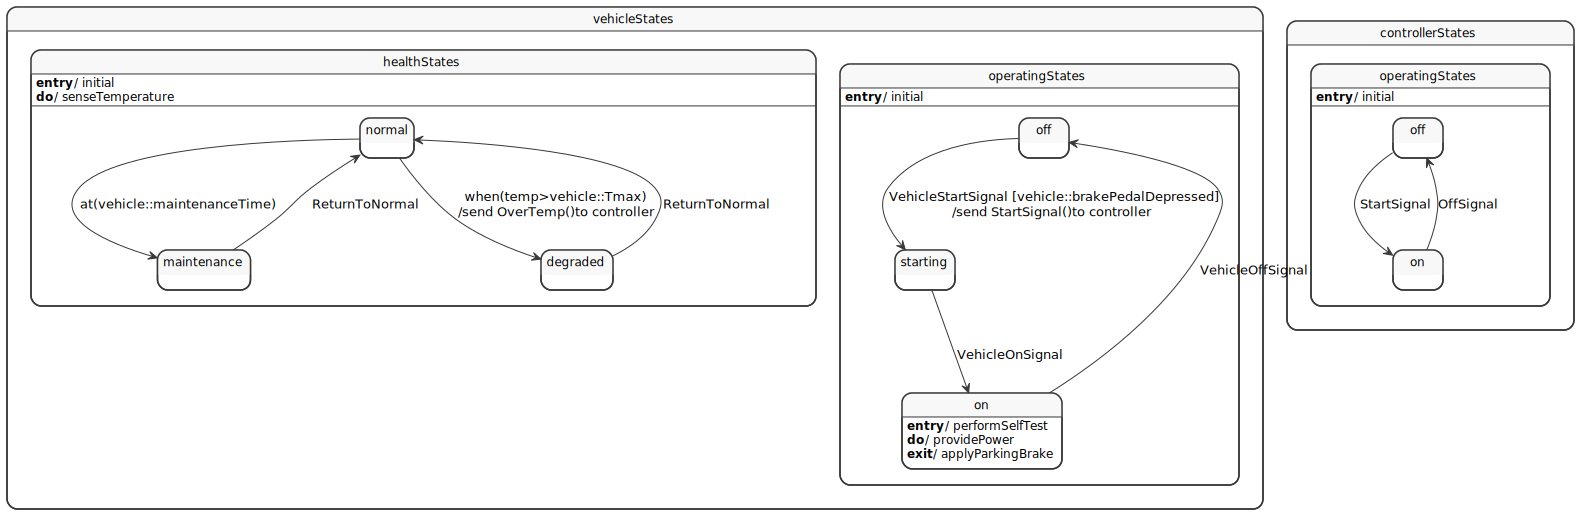

In [7]:
%viz --view=State VehicleModel::VehicleConfigurations::VehicleConfiguration_b::States

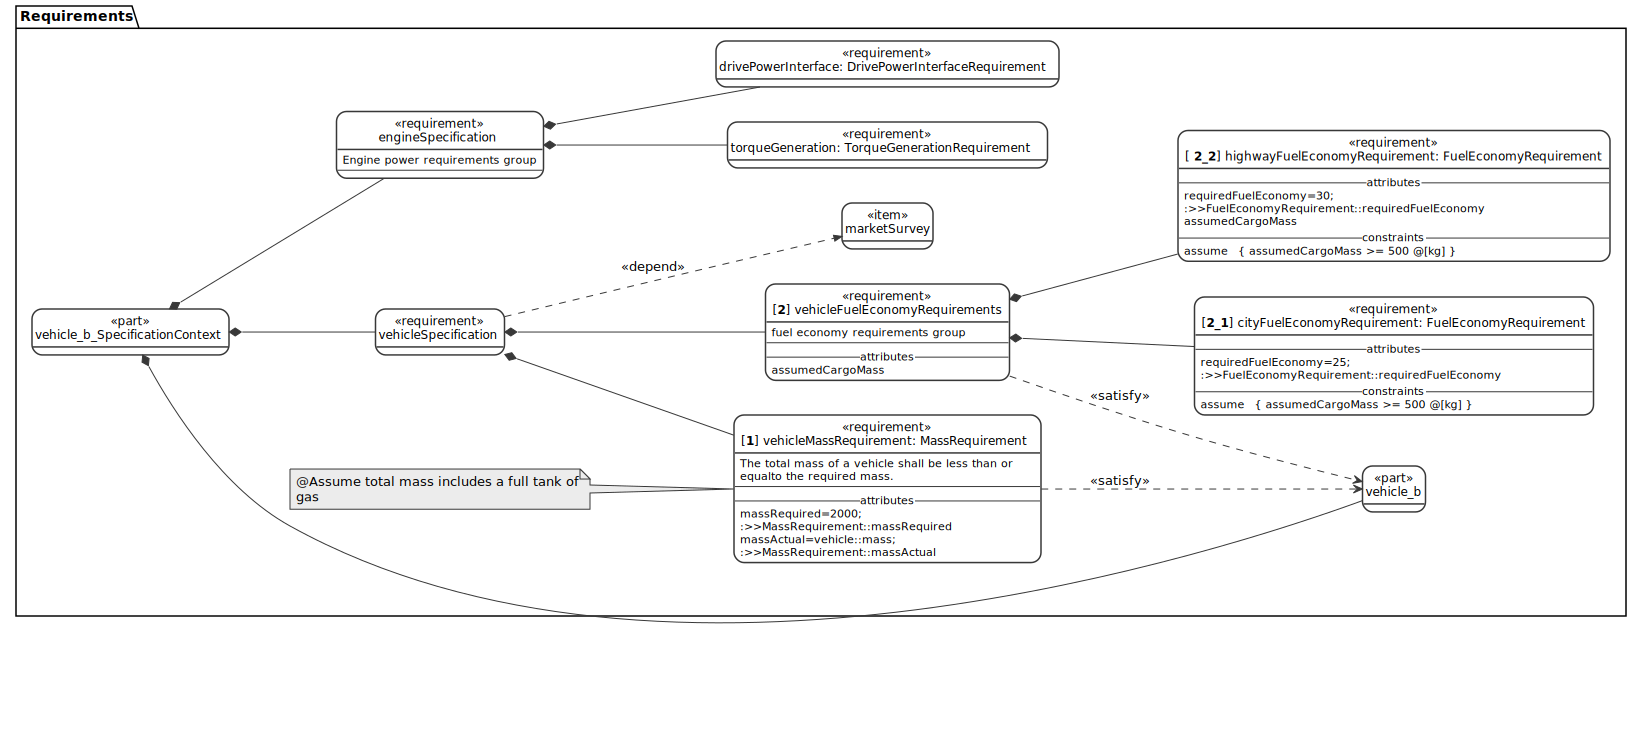

In [8]:
%viz --style=LR --view=Default VehicleModel::VehicleConfigurations::VehicleConfiguration_b::Requirements

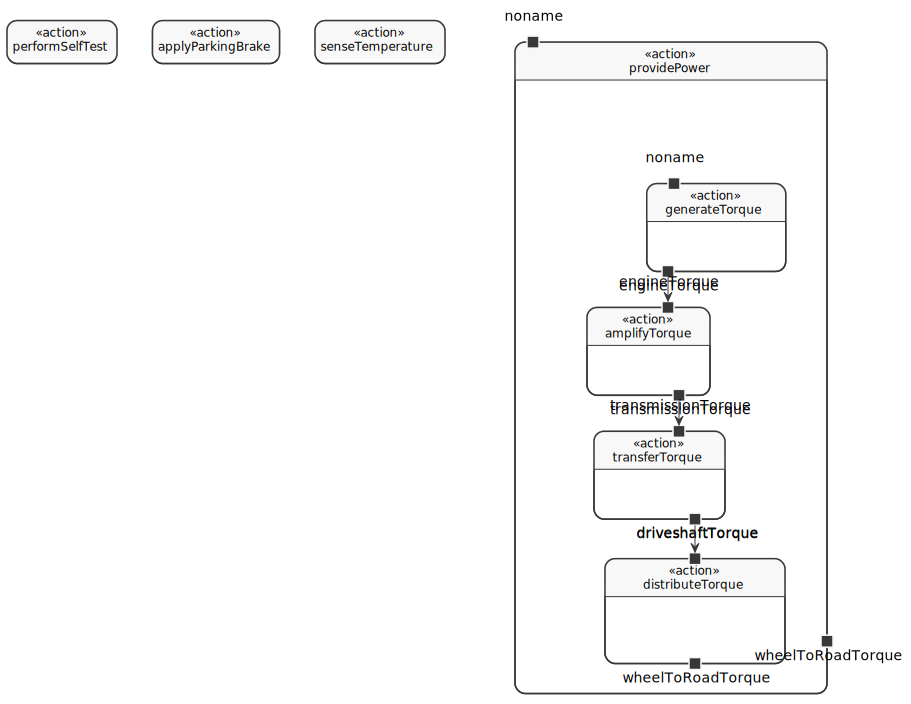

In [9]:
%viz --style=TB --view=Action VehicleModel::VehicleConfigurations::VehicleConfiguration_b::ActionTree

In [13]:
%viz --style=TB --view=Default VehicleModel::VehicleConfigurations::VehicleConfiguration_b::PartsTree

RuntimeException: 

In [11]:
%show "VehicleModel::Definitions::PartDefinitions::Vehicle"

PartDefinition Vehicle (b5ee5d91-968e-4284-b132-201d33cc47f8)
  [Superclassing (implicit)] PartDefinition Part (2f110932-f8f6-4d9b-ab1c-3495fad526fd)
  [FeatureMembership] AttributeUsage mass (fb4b4930-d86a-4f41-94e8-c409bb222563)
    [Subsetting] AttributeUsage mass (07d6e8c1-466b-4047-8c03-fa53ba698472)
  [FeatureMembership] AttributeUsage dryMass (56f0ed54-8c7a-4c22-9c95-69e552a4e243)
    [Subsetting] AttributeUsage mass (07d6e8c1-466b-4047-8c03-fa53ba698472)
  [FeatureMembership] AttributeUsage cargoMass (cf803185-4313-4039-b2e1-7511ee8b19cf)
    [Subsetting] AttributeUsage mass (07d6e8c1-466b-4047-8c03-fa53ba698472)
  [FeatureMembership] AttributeUsage position (5266850f-6b65-404c-816a-b3dc653454dc)
    [Subsetting] AttributeUsage length (7b7d158a-875d-4546-bce3-d8f1b7be75eb)
  [FeatureMembership] AttributeUsage velocity (f16f0bf2-8e17-43a8-804e-f0fa77918565)
    [Subsetting] AttributeUsage speed (9d516094-ca52-405b-88a7-95b04b94ce2b)
  [FeatureMembership] AttributeUsage accelerat

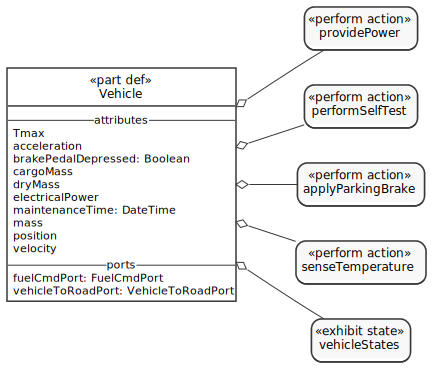

In [12]:
%viz --style=LR --view=Default "VehicleModel::Definitions::PartDefinitions::Vehicle"